파이썬 머신러닝 완벽 가이드 개정2판
ch8. 1~3
p.488-508

# 8. 텍스트 분석

### [NLP이냐 텍스트 분석이냐?]
- 텍스트 분석 : 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법을 통칭함
- 감성 분석 : 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법
- 텍스트 요약 : 텍스트 내에서 중요한 주제나 중심 사상을 추출한느 기법
- 텍스트 군집화와 유사도 측정 : 비슷한 유형의 문서에 대해 군집화를 수행하는 기법.

## 01. 텍스트 분석 이해
- 텍스트 분석 : 비정형 데이터인 텍스트를 분석하는 것

### [텍스트 분석 수행 프로세스]
머신러닝 기반의 텍스트 분석 프로세스

1. 텍스트 사전 준비작업 (텍스트 전처리)
2. 피처 벡터화/추출
3. ML 모델 수립 및 학습/예측/평가

### [파이썬 기반의 NLP, 텍스트 분석 패키지]
- NLTK
- Gensim
- SpaCy

## 02. 텍스트 사전 준비 작업 (텍스트 전처리) - 텍스트 정규화
- 클렌징
- 토큰화
- 필터링/스톱 워드 제거/철자 수정
- Stemming
- Lemmatization

NLTK 패키지를 이용해 실습하기

### [클렌징]
텍스트에서 분석에 방해가 되는 불필요한 문자, 기호 등을 사전에 제거

### [텍스트 토큰화]
**문장 토큰화**

 - 문서에서 문장을 분리
 - 문장의 마침표, 개행문자 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적
 - 각 문장이 가지는 시맨틱적인 의미가 중요한 요소로 사용될 때도 사용함
 - NTLK에서 일반적으로 많이 쓰이는 sent_tokenize를 이용해 토큰화하기


In [16]:
# 현재 nltk 제거
!pip uninstall nltk

# nltk의 특정 버전 설치 (예: 3.5 버전)
!pip install nltk==3.5


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Would remove:
    /usr/local/bin/nltk
    /usr/local/lib/python3.11/dist-packages/nltk-3.9.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/nltk/*
Proceed (Y/n)? y
  Successfully uninstalled nltk-3.9.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434679 sha256=ee3b1d8a5b1d2fec81db9db1be72fb517a28230feb2476aadb80bb4526886435
  Stored in directory: /root/.cache/pip/wheels/2a/15/d3/9d3c11455a8402f6764680d7a19167d667203522cbc07262e8
Successfully built nltk
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.5 which is incompatible.


In [1]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
You can see it out your window or on your television. \
You feel it when you go to work, or go to church or pay your taxes.'

sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import nltk
nltk.download('punkt') # 마침표, 개행 문자 등의 데이터 세트 다운로드
from nltk import sent_tokenize

text_sample = 'The Matrix is everywhere its all around us, here even in this room.You can see it out your window or on your television. You feel it when you go to work, or go to church or pay your taxes.'

sentences = sent_tokenize(text_sample)

print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 2
['The Matrix is everywhere its all around us, here even in this room.You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**단어 토큰화**

- 문장에서 단어를 토큰으로 분리
- 공백, 콤마(,), 마침표(.), 개행문자 등으로 단어를 분리
- 정규 표현식을 이용해 다양한 유형으로 토크화 수행
- NTLK에서 기본으로 제공하는 word_tokenize()를 이용해 단어로 토큰화하기

In [3]:
from nltk import word_tokenize

sentence = 'The Matrix is everwhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everwhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


sent_tokenize와 word_tokenize를 조합해 문서에 대해서 모든 단어를 토큰화하기

In [4]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 2
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room.You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


n-gram
- 문장을 단어별로 하나씩 토큰화 할 경우 문맥적인 의미가 무시되는 문제를 조금이라도 해결
- 연속된 n개의 단어를 하나의 토큰화 단위로 분리해 내는 것
- n개 단어 크기 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화를 수행

### [스톱 워드 제거]

스톱 워드 (Stop word) : 분석에 큰 의미가 없는 단어를 지칭
- ex : is, the, a, WittenBellProbDist
- 문법적인 특성으로 인해 빈번하게 등장 -> 중요한 단어로 인지됨
- 언어별로 스톱 워드가 목록화돼 있음

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


위 예제에서 3개의 문장별로 단어를 토큰화해 생성된 word_tokens 리스트에 대해 stopwords를 필터링으로 제거해 분석을 위한 의미 있는 단어만 추출하기

In [7]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words = []
    # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
    for word in sentence :
        # 소문자로 모두 변환
        word = word.lower()
        # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords :
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room.you', 'see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


=> is, this 와 같은 스톱 워드가 필터링을 통해 제거됨

### [Stemming과 Lemmatization]

문법적 또는 의미적으로 변화하는 단어의 원형을 찾기

**Lemmatization**
- Stemming 보다 정교함, 의미론적인 기반에서 단어의 원형을 찾음
- 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾음
- 변환에 더 오랜 시간을 필요로 함

**Stemming**
- 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화한 방법을 적용
- -> 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향

**NLTK**
- Stemmer : Porter, Lancaster, SnowballStemmer
- Lemmatization : WordNetLemmatizer

In [8]:
# NLTK의 LancasterStemmer
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [9]:
# NLTK의 Lemmatization
# 단어의 '품사' 입력

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


## 03 Bag of Words - BOW

BOW 모델 : 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델

예시
- 문장 1 : 'My wife likes to watch baseball games and my daughter likes to watch baseball games too'
- 문장 2 : 'My wife likes to play baseball'

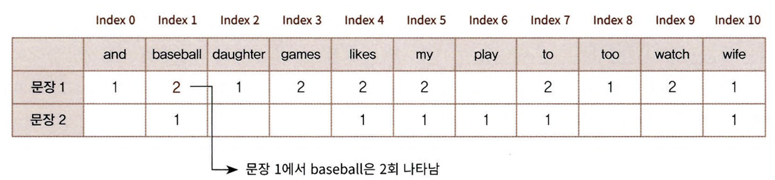

**BOW 모델의 장점**
- 쉽고 빠른 구축
- 예상보다 문서의 특징을 잘 나타낼 수 있는 모델이라서 전통적으로 여러 분야에서 활용도가 높음

**BOW 모델의 단점**
- 문맥 의미 반영 부족
- 희소 행렬 문제

### [BOW 피처 벡터화]

피처 벡터화 : 텍스트는 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환
- 기존 텍스트 데이터를 또 다른 형태의 피처의 조합으로 변경
- 넓은 범위의 피처 추출에 포함함
- BOW의 피처 벡터화의 방식
 - 카운트 기반의 벡터화 : 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수를 부여함 => 카운트 값이 높을수록 중요한 단어로 인식
 - TF-IDF 기반의 벡터화 : 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 패널티를 줌

### [사이킷런의 Count 및 TF-IDf 벡터화 구현 : CountVectorizer, TfidfVectorizer]

**사이킷런의 CountVectorizer 클래스**
- 카운트 기반의 벡터화를 구현한 클래스
- 파라미터
 - max_df / min_df : 전체 문서에 걸쳐 너무 높/낮은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터
 - max_features : 추출하는 피처의 개수를 제한
 - stop_words : 'englisth'로 지정하면 영어의 스톱 워드로 지정된 단어는 추출에서 제외됨
 - n_gram_range : 단어 순서를 어느 정도 보강하기 위한 n_gram 범위를 설정
 - analyzer : 피처 추출을 수행한 단위를 지정
 - token_pattern : 토큰화를 수행하는 정규 표현식 패턴을 지정
 - tokenizer : 토큰화를 별도의 커스텀 함수로 이용시 적용

- 피처 벡터화 방식
 - 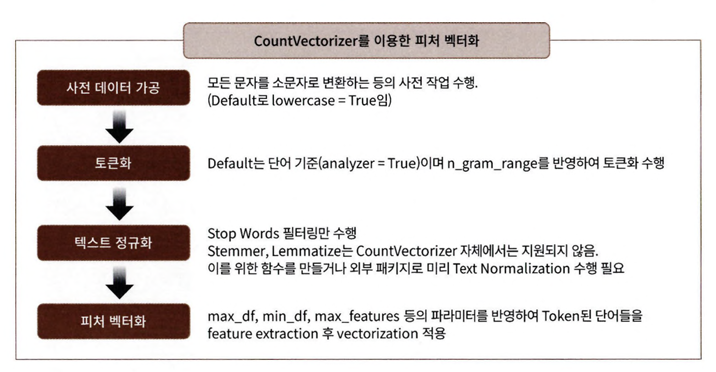

### [BOW 벡터화를 위한 희소 행렬]

사이킷런의 CountVectorizer/TfidfVectorizer 를 이용해 텍스트를 피처 단위로 벡터화해 변환 후 CSR 형태의 희소 행렬을 반환함

**희소 행렬**
- 대규모 행렬의 대부분의 값을 0이 차지하는 행렬
- BOW 형태를 가진 언어 모델의 피처 벡터화는 대부분 희소 행렬
- 희소 행렬은 메모리 공간이 많이 필요하고, 크기가 커서 시간이 많이 소모됨
- 적은 메모리 공간을 차지하게 변환하는 방법 : COO 형식, CSR 형식

### [희소 행렬 - COO 형식]
**COO 형식**

0이 아닌 데이터만 별도의 데이터 배열에 저장하고 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식

In [12]:
import numpy as np

dense = np.array([[3,0,1], [0,2,0]])

## COO 희소 행렬로 변환하기

from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])
# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])
# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [13]:
# 다시 밀집 형태의 행렬로 출력
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

### [희소행렬 - CSR 형식]

**CSR 형식**
- COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이털르 사용하는 문제점을 해결한 방식

**COO 변환 형식의 문제점**
- 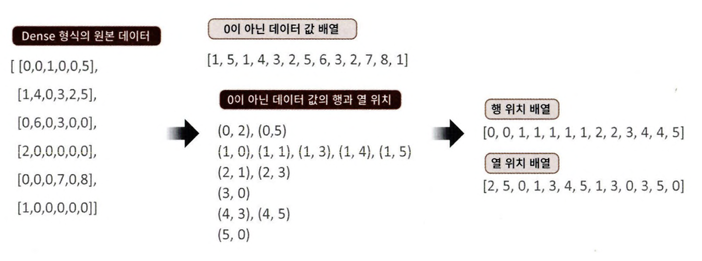

**CSR로 변환하는 방식**
- 고유값의 시작 위치만 알고 있으면 얼마든지 행 위치 배열을 다시 만들 수 있음
- 메모리가 적게 들고 빠른 연산이 가능함
- 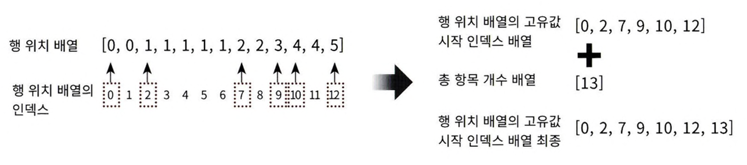

In [16]:
from scipy import sparse

dense2 = np.array([[0, 0, 1, 0, 0, 5],
                    [1, 4, 0, 3, 2, 5],
                    [0, 6, 0, 3, 0, 0],
                    [2, 0, 0, 0, 0, 0],
                    [0, 0, 0, 7, 0, 8],
                    [1, 0, 0, 0, 0, 0]])

#0이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1 ])

#행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

#COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

#행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

#CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))
print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성함

In [17]:
dense3 = np.array([[0, 0, 1, 0, 0, 5],
                    [1, 4, 0, 3, 2, 5],
                    [0, 6, 0, 3, 0, 0],
                    [2, 0, 0, 0, 0, 0],
                    [0, 0, 0, 7, 0, 8],
                    [1, 0, 0, 0, 0, 0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)